<a href="https://colab.research.google.com/github/nouf01/STC-IPTV-content-based-recommendation-system/blob/main/iptv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Installations**

In [ ]:
!apt-get install p7zip-full

In [ ]:
!pip install py7zr
!pip install pandas==1.1.2
!pip install openpyxl==3.0.5
!pip install xlrd==1.2.0
!pip install hypothesis
!pip install jupyterlab==3.0.0b4
!pip install bottleneck
!pip install numexpr
!pip install python-dateutil
!pip install pytz
!pip install NumPy
!pip install setuptools
!pip install pytest
!pip install BeautifulSoup4==4.9.1 --use-feature=2020-resolver

In [ ]:
!pip install rake-nltk

In [ ]:
!pip install python-rake

In [ ]:
!pip install PyMovieDb

In [6]:
!pip install pillow

# STC IPTV Dataset
Preprocess and some EDA

In [7]:
import py7zr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import matplotlib.image as image
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
%matplotlib inline

In [8]:
# to extract the dataset
with py7zr.SevenZipFile('/content/stc-IPTV-Data-Set (1).7z', mode='r') as z:
    z.extractall()

In [9]:
# Load the dataset
stc = pd.read_csv('/content/Final_Dataset.txt', skipinitialspace=True, delimiter = ",")

In [10]:
# drop the unamed column
stc = stc.drop('Unnamed: 0', axis=1)

# remove extra space and make all titles in lowercase
stc['program_name'] = stc['program_name'].str.strip()
stc['program_name'] = stc['program_name'].str.lower()

In [11]:
stc.head(100)

,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name
0,2017-05-27,26138,100 treets,40,MOVIE,0,0,Drama Movie100 Streets,Drama,0,0,100 treets
1,2017-05-21,7946,moana,17,MOVIE,0,0,Animation MovieMoana (HD),Animation,0,1,Moana
2,2017-08-10,7418,the mermaid princess,8,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
3,2017-07-26,19307,the mermaid princess,76,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
4,2017-07-07,15860,churchill,87,MOVIE,0,0,Biography MovieChurchill (HD),Biography,0,1,Churchill
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2017-03-18,200,why did i get married too?,4,MOVIE,0,0,Comedy MovieWhy Did I Get Married Too? (HD),Comedy,0,1,Why Did I Get Married Too?
96,2018-01-11,26302,kung fu panda: legends of awesomeness,48,SERIES/EPISODES,1,0,Animation MovieKung Fu Panda: Legends Of Aweso...,Animation,1,1,Kung Fu Panda: Legends Of Awesomeness
97,2017-10-27,26281,going in tyle,17,MOVIE,0,0,Comedy MovieGoing in Style (HD),Comedy,0,1,Going in tyle
98,2017-10-10,3218,melissa & joey,10,SERIES/EPISODES,1,0,"Comedy MovieMelissa & Joey, S01",Comedy,1,1,Melissa & Joey


In [12]:
stc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3598607 entries, 0 to 3598606
Data columns (total 12 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   date_             object
 1   user_id_maped     int64 
 2   program_name      object
 3   duration_seconds  int64 
 4   program_class     object
 5   season            int64 
 6   episode           int64 
 7   program_desc      object
 8   program_genre     object
 9   series_title      int64 
 10  hd                int64 
 11  original_name     object
dtypes: int64(6), object(6)
memory usage: 329.5+ MB


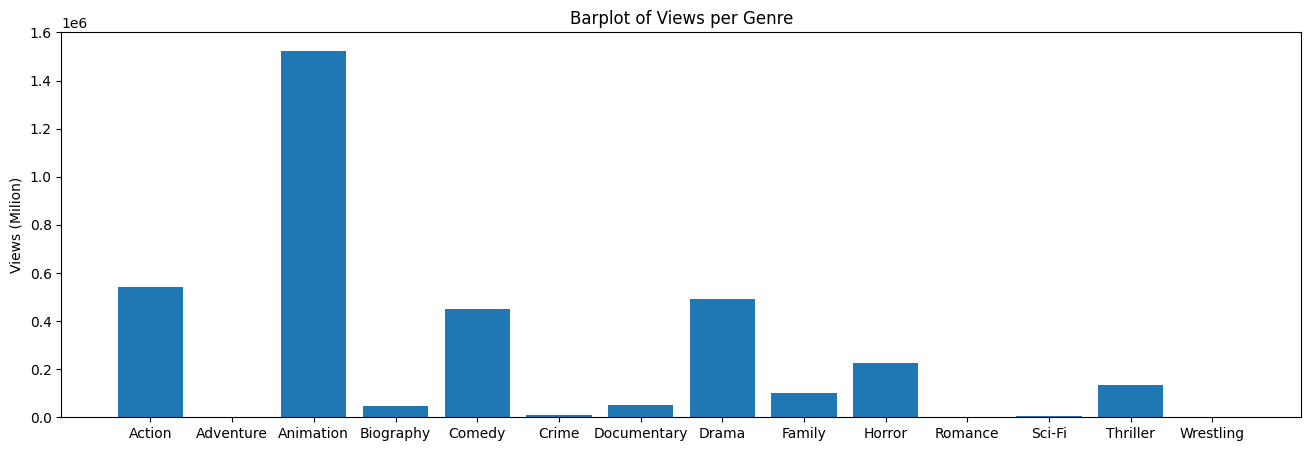

In [13]:
#Number of view for each genre
df = stc[['user_id_maped', 'program_genre']].groupby('program_genre').size()
df.drop('NOT_DEFINED_IN_UMS', axis=0, inplace=True)
df.drop('SERIES_NOT_ADDED_UNDER_ANY_GENRE', axis=0, inplace=True)
views = df.tolist()
fig, axes = plt.subplots(figsize=(16,5), dpi=100)
plt.bar(df.index, height=views)
plt.ylabel('Views (Milion)')
plt.title('Barplot of Views per Genre');

program_genre
Action         1173
Adventure         4
Animation      1577
Biography        42
Comedy         1365
Crime           219
Documentary     166
Drama          2845
Family           58
Horror          331
Romance          12
Sci-Fi           23
Thriller        501
Wrestling         1
dtype: int64

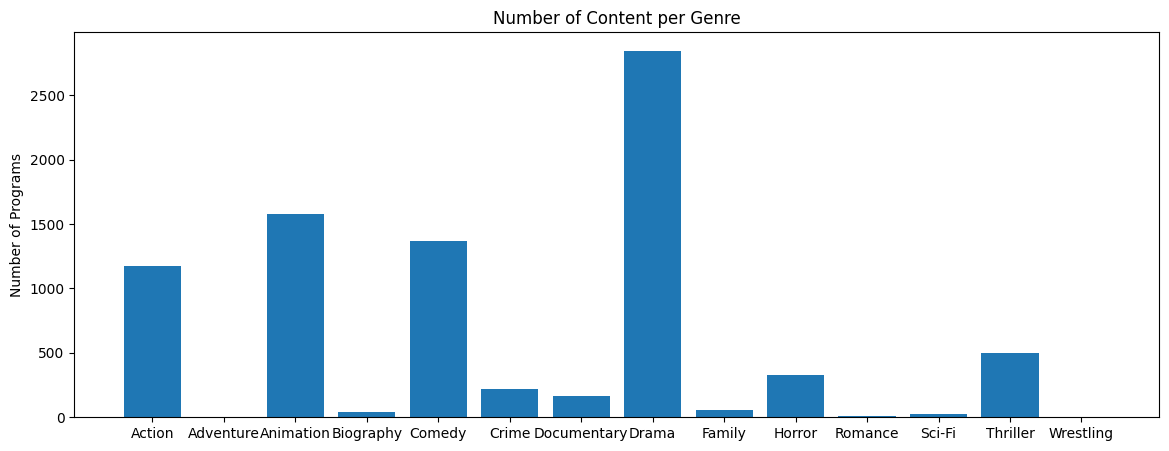

In [14]:
#Number of programs for each genre
df = stc[['program_name','user_id_maped','program_genre']].groupby(['program_name'], as_index = False).max()
df = df[['program_name','program_genre']].groupby(['program_genre']).size()
df.drop('NOT_DEFINED_IN_UMS', axis=0, inplace=True)
df.drop('SERIES_NOT_ADDED_UNDER_ANY_GENRE', axis=0, inplace=True)
program_per_genre = df.tolist()
fig, axes = plt.subplots(figsize=(14,5), dpi=100)
plt.bar(df.index, height=program_per_genre)
plt.ylabel('Number of Programs')
plt.title('Number of Content per Genre');
df

In [15]:
# Select needed columns
stc = stc[['user_id_maped','duration_seconds','program_name', 'program_class', 'program_genre', 'hd',  'date_', 'original_name']]

In [16]:
# check for NaN
stc.isna().sum()

user_id_maped       0
duration_seconds    0
program_name        0
program_class       0
program_genre       0
hd                  0
date_               0
original_name       0
dtype: int64

In [17]:
stc.columns

Index(['user_id_maped', 'duration_seconds', 'program_name', 'program_class',
       'program_genre', 'hd', 'date_', 'original_name'],
      dtype='object')

In [18]:
stc.head(200)

,user_id_maped,duration_seconds,program_name,program_class,program_genre,hd,date_,original_name
0,26138,40,100 treets,MOVIE,Drama,0,2017-05-27,100 treets
1,7946,17,moana,MOVIE,Animation,1,2017-05-21,Moana
2,7418,8,the mermaid princess,MOVIE,Animation,1,2017-08-10,The Mermaid Princess
3,19307,76,the mermaid princess,MOVIE,Animation,1,2017-07-26,The Mermaid Princess
4,15860,87,churchill,MOVIE,Biography,1,2017-07-07,Churchill
...,...,...,...,...,...,...,...,...
195,13456,4339,the mermaid princess,MOVIE,Animation,1,2017-08-07,The Mermaid Princess
196,33848,1884,teen wolf co-captain,SERIES/EPISODES,Action,0,2017-04-29,Teen Wolf
197,24121,87,dragon ball z: resurrection f,MOVIE,Animation,0,2017-10-21,Dragon Ball Z: Resurrection F
198,10438,92,the boss baby,MOVIE,Animation,1,2018-01-20,The Boss Baby


In [19]:
# how many programs?
stc['program_name'].nunique()

8394

In [20]:
# how many programs?
stc['program_genre'].nunique()

16

In [21]:
# number of movie in the dataset
stc[stc["program_class"] == 'MOVIE']['program_name'].nunique()

1517

In [22]:
# number of tv shows in the dataset
stc[stc["program_class"] == 'SERIES/EPISODES']['program_name'].nunique()

6881

In [23]:
# number of unique users
stc['user_id_maped'].nunique()

29487

In [24]:
# subset the data to work only on movies
stc = stc[stc["program_class"] == 'MOVIE']

In [25]:
#records reduced to 1544952
stc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1544952 entries, 0 to 3598606
Data columns (total 8 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   user_id_maped     1544952 non-null  int64 
 1   duration_seconds  1544952 non-null  int64 
 2   program_name      1544952 non-null  object
 3   program_class     1544952 non-null  object
 4   program_genre     1544952 non-null  object
 5   hd                1544952 non-null  int64 
 6   date_             1544952 non-null  object
 7   original_name     1544952 non-null  object
dtypes: int64(3), object(5)
memory usage: 106.1+ MB


In [26]:
stc['program_name'].nunique()

1517

# IMDB 10K Movies Dataset
The IMDB 10000 movies dataset, contains information for 10000 movies from IMDb, including their names, release dates, user ratings, genres, overviews, cast and more.

• We will join IPTV with IMDb based on the program_name column

In [27]:
imdb_dataset = pd.read_csv('/content/imdb2.csv')
imdb_dataset['program_name'] = imdb_dataset['program_name'].str.strip()
imdb_dataset['program_name'] = imdb_dataset['program_name'].str.lower()

In [28]:
# contains 10178 rows
imdb_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   program_name  10178 non-null  object 
 1   date_x        10178 non-null  object 
 2   score         10178 non-null  int64  
 3   genre         10093 non-null  object 
 4   overview      10178 non-null  object 
 5   crew          10122 non-null  object 
 6   orig_title    10178 non-null  object 
 7   status        10178 non-null  object 
 8   orig_lang     10178 non-null  object 
 9   budget_x      10178 non-null  float64
 10  revenue       10178 non-null  float64
 11  country       10178 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 954.3+ KB


In [29]:
imdb_dataset

,program_name,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,creed iii,3/2/2023,73,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,avatar: the way of water,12/15/2022,78,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,the super mario bros. movie,4/5/2023,76,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,mummies,1/5/2023,70,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,supercell,3/17/2023,61,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US
...,...,...,...,...,...,...,...,...,...,...,...,...
10173,20th century women,12/28/2016,73,Drama,"In 1979 Santa Barbara, California, Dorothea Fi...","Annette Bening, Dorothea Fields, Lucas Jade Zu...",20th Century Women,Released,English,7000000.0,9.353729e+06,US
10174,delta force 2: the colombian connection,8/24/1990,54,Action,When DEA agents are taken captive by a ruthles...,"Chuck Norris, Col. Scott McCoy, Billy Drago, R...",Delta Force 2: The Colombian Connection,Released,English,9145817.8,6.698361e+06,US
10175,the russia house,12/21/1990,61,"Drama, Thriller, Romance","Barley Scott Blair, a Lisbon-based editor of R...","Sean Connery, Bartholomew 'Barley' Scott Blair...",The Russia House,Released,English,21800000.0,2.299799e+07,US
10176,darkman ii: the return of durant,7/11/1995,55,"Action, Adventure, Science Fiction, Thriller, ...",Darkman and Durant return and they hate each o...,"Larry Drake, Robert G. Durant, Arnold Vosloo, ...",Darkman II: The Return of Durant,Released,English,116000000.0,4.756613e+08,US


In [30]:
imdb_dataset.program_name.nunique()

9656

In [31]:
# used later for easier access
imdb_dataset['indx'] = imdb_dataset.index

In [32]:
imdb_dataset['program_name'].unique()

array(['creed iii', 'avatar: the way of water',
       'the super mario bros. movie', ..., 'the russia house',
       'darkman ii: the return of durant',
       'the swan princess: a royal wedding'], dtype=object)

In [33]:
# The Features that will be used to extract keywords
features = ['genre','overview','country']

In [34]:
def combine_features(row):
    return row['genre'].replace('\xa0', '').replace(',',' ')+" "+row['overview']+" "+row['country']

In [35]:
for feature in features:
    imdb_dataset[feature] = imdb_dataset[feature].fillna('')

In [36]:
# applying combined_features() method over each rows of
imdb_dataset["combined_features"] = imdb_dataset.apply(combine_features,axis=1)

In [37]:
imdb_dataset.iloc[2000].combined_features

'Animation Family "Barbie" stars as Clara in this animated retelling of the classic Christmas ballet, complete with Tchaikovsky soundtrack and ballet choreography. AU'

# Extract Keywords

To measure the similarity between movies, the model must be provided with some keywords for each movie.


*   In our case, not all movies come have keywords, so we extract keywords from the movie description using RAKE algorithm.
*   RAKE short for Rapid Automatic Keyword Extraction algorithm.

In [38]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [39]:
from rake_nltk import Rake
imdb_dataset['Key_words'] = ''
r = Rake()
for index, row in imdb_dataset.iterrows():
    r.extract_keywords_from_text(row['overview'])
    key_words_dict_scores = r.get_word_degrees()
    items = key_words_dict_scores.items()
    ordered = sorted(items,reverse = True, key=lambda x: x[1])
    result = ' ,'.join(string for (string, _) in ordered)
    imdb_dataset.at[index,'Key_words']= result
imdb_dataset

,program_name,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country,indx,combined_features,Key_words
0,creed iii,3/2/2023,73,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU,0,Drama Action After dominating the boxing world...,"boxing ,adonis ,former ,damien ,prodigy ,must ..."
1,avatar: the way of water,12/15/2022,78,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU,1,Science Fiction Adventure Action Set more than...,"first ,film ,sully ,family ,kids ,), ,stay ,al..."
2,the super mario bros. movie,4/5/2023,76,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU,2,Animation Adventure Family Fantasy Comedy Whil...,"— ,mario ,brothers ,brooklyn ,plumbers ,luigi ..."
3,mummies,1/5/2023,70,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU,3,Animation Comedy Family Adventure Fantasy Thro...,"ambitious ,archaeologist ,lord ,carnaby ,three..."
4,supercell,3/17/2023,61,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US,4,Action Good-hearted teenager William always li...,"william ,hearted ,teenager ,always ,lived ,fat..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10173,20th century women,12/28/2016,73,Drama,"In 1979 Santa Barbara, California, Dorothea Fi...","Annette Bening, Dorothea Fields, Lucas Jade Zu...",20th Century Women,Released,English,7000000.0,9.353729e+06,US,10173,"Drama In 1979 Santa Barbara, California, Dorot...","– ,two ,younger ,women ,abbie ,dorothea ,spiri..."
10174,delta force 2: the colombian connection,8/24/1990,54,Action,When DEA agents are taken captive by a ruthles...,"Chuck Norris, Col. Scott McCoy, Billy Drago, R...",Delta Force 2: The Colombian Connection,Released,English,9145817.8,6.698361e+06,US,10174,Action When DEA agents are taken captive by a ...,"ruthless ,south ,american ,kingpin ,dea ,agent..."
10175,the russia house,12/21/1990,61,"Drama, Thriller, Romance","Barley Scott Blair, a Lisbon-based editor of R...","Sean Connery, Bartholomew 'Barley' Scott Blair...",The Russia House,Released,English,21800000.0,2.299799e+07,US,10175,"Drama Thriller Romance Barley Scott Blair, a L...","barley ,scott ,blair ,unexpectedly ,begins ,wo..."
10176,darkman ii: the return of durant,7/11/1995,55,"Action, Adventure, Science Fiction, Thriller, ...",Darkman and Durant return and they hate each o...,"Larry Drake, Robert G. Durant, Arnold Vosloo, ...",Darkman II: The Return of Durant,Released,English,116000000.0,4.756613e+08,US,10176,Action Adventure Science Fiction Thriller Horr...,"durant ,darkman ,drug ,trade ,using ,high ,mus..."


In [40]:
imdb_dataset[['orig_title','overview','Key_words']]

,orig_title,overview,Key_words
0,Creed III,"After dominating the boxing world, Adonis Cree...","boxing ,adonis ,former ,damien ,prodigy ,must ..."
1,Avatar: The Way of Water,Set more than a decade after the events of the...,"first ,film ,sully ,family ,kids ,), ,stay ,al..."
2,The Super Mario Bros. Movie,"While working underground to fix a water main,...","— ,mario ,brothers ,brooklyn ,plumbers ,luigi ..."
3,Momias,"Through a series of unfortunate events, three ...","ambitious ,archaeologist ,lord ,carnaby ,three..."
4,Supercell,Good-hearted teenager William always lived in ...,"william ,hearted ,teenager ,always ,lived ,fat..."
...,...,...,...
10173,20th Century Women,"In 1979 Santa Barbara, California, Dorothea Fi...","– ,two ,younger ,women ,abbie ,dorothea ,spiri..."
10174,Delta Force 2: The Colombian Connection,When DEA agents are taken captive by a ruthles...,"ruthless ,south ,american ,kingpin ,dea ,agent..."
10175,The Russia House,"Barley Scott Blair, a Lisbon-based editor of R...","barley ,scott ,blair ,unexpectedly ,begins ,wo..."
10176,Darkman II: The Return of Durant,Darkman and Durant return and they hate each o...,"durant ,darkman ,drug ,trade ,using ,high ,mus..."


In [41]:
imdb_dataset['combined_features'] = ''
columns = ['genre', 'Key_words']
for index, row in imdb_dataset.iterrows():
    combined = row['genre']+" "+ str(row['Key_words'])+ ' '+row['orig_lang']
    imdb_dataset.at[index,'combined_features'] = combined

imdb_keywords = imdb_dataset[['program_name','combined_features']]

In [42]:
imdb_keywords

,program_name,combined_features
0,creed iii,"Drama, Action boxing ,adonis ,former ,damien ,..."
1,avatar: the way of water,"Science Fiction, Adventure, Action first ,film..."
2,the super mario bros. movie,"Animation, Adventure, Family, Fantasy, Comedy ..."
3,mummies,"Animation, Comedy, Family, Adventure, Fantasy ..."
4,supercell,"Action william ,hearted ,teenager ,always ,liv..."
...,...,...
10173,20th century women,"Drama – ,two ,younger ,women ,abbie ,dorothea ..."
10174,delta force 2: the colombian connection,"Action ruthless ,south ,american ,kingpin ,dea..."
10175,the russia house,"Drama, Thriller, Romance barley ,scott ,blair ..."
10176,darkman ii: the return of durant,"Action, Adventure, Science Fiction, Thriller, ..."


In [44]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

cv = CountVectorizer() #creating new CountVectorizer() object
count_matrix = cv.fit_transform(imdb_dataset["combined_features"]) #feeding combined strings(movie contents) to C

In [45]:
cosine_sim = cosine_similarity(count_matrix)

# Method 1: Merge two datasets


In [50]:
# merge stc with IMDB dataset using pandas.merge
stc['program_name'] = stc['program_name'].str.lower()
imdb_dataset['program_name'] = imdb_dataset['program_name'].str.lower()

merged = pd.merge(stc,imdb_dataset)

In [51]:
# from 1544952 records we have 1141258
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1132958 entries, 0 to 1132957
Data columns (total 22 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   user_id_maped      1132958 non-null  int64  
 1   duration_seconds   1132958 non-null  int64  
 2   program_name       1132958 non-null  object 
 3   program_class      1132958 non-null  object 
 4   program_genre      1132958 non-null  object 
 5   hd                 1132958 non-null  int64  
 6   date_              1132958 non-null  object 
 7   original_name      1132958 non-null  object 
 8   date_x             1132958 non-null  object 
 9   score              1132958 non-null  int64  
 10  genre              1132958 non-null  object 
 11  overview           1132958 non-null  object 
 12  crew               1127726 non-null  object 
 13  orig_title         1132958 non-null  object 
 14  status             1132958 non-null  object 
 15  orig_lang          1132958 non-n

In [52]:
merged['program_name'].nunique()

853

In [53]:
merged['program_name'].unique()

array(['moana', 'churchill', 'beavis and butt-head do america', 'coco',
       'kidnap', 'the accountant', 'the birth of a nation', 'baywatch',
       'alien: covenant', 'kingsman: the golden circle', 'pitch perfect',
       'sully', 'last knights', 'land of the dead', 'geostorm', 'trolls',
       'inside', 'underworld: awakening', 'extraterrestrial', 'ferdinand',
       'monsters university', 'war for the planet of the apes',
       "surf's up", 'free fire', 'snatched', 'no reservations',
       'the nice guys', 'dunkirk', 'soul men', 'no country for old men',
       'the boss baby', 'baby driver', 'paranormal activity',
       'total recall', 'collateral beauty', "assassin's creed",
       'the girl on the train', 'batman and harley quinn', 'inside man',
       'premium rush', 'rings', 'my cousin rachel', 'the founder',
       'gifted', 'big daddy', '101 dalmatians',
       'captain underpants: the first epic movie', 'zombieland',
       'the holiday', 'unforgettable', 'burnt', 'seve

In [54]:
merged['user_id_maped'].nunique()

26286

In [55]:
merged.sort_values(by = 'date_')[['user_id_maped','duration_seconds','program_name','date_','orig_title','score','genre','overview','crew','status','date_x','budget_x','revenue','country','orig_lang','Key_words','combined_features']].head(2)

,user_id_maped,duration_seconds,program_name,date_,orig_title,score,genre,overview,crew,status,date_x,budget_x,revenue,country,orig_lang,Key_words,combined_features
1032003,29080,1841,tarzan,2017-03-14,Tarzan,57,"Animation, Action, Adventure, Family",One of the most classic and revered stories of...,"Kellan Lutz, Tarzan (voice), Spencer Locke, Ja...",Released,9/11/2014,145000000.0,448191819.0,AU,English,"tarzan ,edgar ,rice ,burroughs ,mercenary ,arm...","Animation, Action, Adventure, Family tarzan ,e..."
654018,13743,82,stalingrad,2017-03-14,Stalingrad,73,"Drama, History, War","""Stalingrad"" follows the progress of a German ...","Dominique Horwitz, Obergefreiter Fritz Reiser,...",Released,6/8/1995,5714523.8,152972.0,AU,German,"platoon ,stalingrad ,german ,brutal ,fighting ...","Drama, History, War platoon ,stalingrad ,germa..."


In [56]:
# to get the top watched movie for each user
# using sum over the duration seconds
newMerged = merged[['user_id_maped','duration_seconds','program_name']]
top_watched_movies_per_user = newMerged.groupby(['user_id_maped','program_name'], as_index = False).sum().groupby('user_id_maped', as_index = False).max() #sort_Values?


In [57]:
merged.loc[merged['user_id_maped'] == 1]

,user_id_maped,duration_seconds,program_name,program_class,program_genre,hd,date_,original_name,date_x,score,...,crew,orig_title,status,orig_lang,budget_x,revenue,country,indx,combined_features,Key_words
40251,1,87,kidnap,MOVIE,Action,1,2018-02-01,Kidnap,8/4/2017,62,...,"Halle Berry, Karla McCoy, Sage Correa, Frankie...",Kidnap,Released,English,21000000.0,34836080.0,US,4715,"Drama, Thriller kidnapped ,son ,mother ,miniva...","kidnapped ,son ,mother ,minivan ,stops ,nothin..."
65782,1,59,baywatch,MOVIE,Comedy,1,2017-10-07,Baywatch,6/1/2017,61,...,"Dwayne Johnson, Mitch Buchanan, Zac Efron, Mat...",Baywatch,Released,English,60000000.0,175863783.0,AU,1121,"Comedy, Action, Crime devoted ,lifeguard ,mitc...","devoted ,lifeguard ,mitch ,buchannon ,butts ,h..."
288549,1,2,the boss baby,MOVIE,Animation,1,2017-10-06,The Boss Baby,3/23/2017,65,...,"Alec Baldwin, Theodore Templeton (voice), Stev...",The Boss Baby,Released,English,125000000.0,527909949.0,AU,3701,"Animation, Comedy, Family wildly ,imaginative ...","wildly ,imaginative ,7 ,year ,old ,named ,tim ..."
582459,1,5543,men in black,MOVIE,Action,0,2018-02-02,Men In Black,9/11/1997,72,...,"Tommy Lee Jones, Agent K, Will Smith, James Ed...",Men in Black,Released,English,90000000.0,587790539.0,AU,1485,"Action, Adventure, Comedy, Science Fiction new...","new ,agent ,police ,recruit ,jay ,find ,york ,..."
582462,1,47,men in black,MOVIE,Action,0,2018-02-01,Men In Black,9/11/1997,72,...,"Tommy Lee Jones, Agent K, Will Smith, James Ed...",Men in Black,Released,English,90000000.0,587790539.0,AU,1485,"Action, Adventure, Comedy, Science Fiction new...","new ,agent ,police ,recruit ,jay ,find ,york ,..."


In [58]:
imdb_dataset.columns

Index(['program_name', 'date_x', 'score', 'genre', 'overview', 'crew',
       'orig_title', 'status', 'orig_lang', 'budget_x', 'revenue', 'country',
       'indx', 'combined_features', 'Key_words'],
      dtype='object')

In [59]:
imdb_dataset.isna().sum()

program_name          0
date_x                0
score                 0
genre                 0
overview              0
crew                 56
orig_title            0
status                0
orig_lang             0
budget_x              0
revenue               0
country               0
indx                  0
combined_features     0
Key_words             0
dtype: int64

In [61]:
imdb_dataset = imdb_dataset[imdb_dataset['combined_features'].notna()]

Group By mvoies

In [ ]:
first_method_features = ['program_name','duration_seconds','program_class', 'program_genre', 'hd', 'original_name', 'orig_title','score', 'overview', 'genre', 'Key_words', 'crew', 'combined_features']
second_method_features = ['program_name','duration_seconds','program_class', 'program_genre', 'hd', 'original_name', 'imdb_name','poster', 'description', 'genre', 'keywords', 'crew', 'combined_features']

movies_list1 = merged[['program_name','duration_seconds','program_class', 'program_genre', 'hd', 'original_name', 'orig_title','score', 'overview', 'genre', 'Key_words', 'crew', 'combined_features']].groupby(['program_name'],as_index= False).max()

In [63]:
movies_list1['program_name'] = movies_list1['program_name'].str.lower()

In [64]:
movies_list1 = movies_list1.sort_values('program_name', ascending= False)

In [66]:
movies_list1 = movies_list1[movies_list1['Key_words'].notna()]

In [67]:
movies_list1.isna().sum()

program_name         0
duration_seconds     0
program_class        0
program_genre        0
hd                   0
original_name        0
orig_title           0
score                0
overview             0
genre                0
Key_words            0
combined_features    0
dtype: int64

In [68]:
movies_list1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 853 entries, 852 to 0
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   program_name       853 non-null    object
 1   duration_seconds   853 non-null    int64 
 2   program_class      853 non-null    object
 3   program_genre      853 non-null    object
 4   hd                 853 non-null    int64 
 5   original_name      853 non-null    object
 6   orig_title         853 non-null    object
 7   score              853 non-null    int64 
 8   overview           853 non-null    object
 9   genre              853 non-null    object
 10  Key_words          853 non-null    object
 11  combined_features  853 non-null    object
dtypes: int64(3), object(9)
memory usage: 86.6+ KB


In [69]:
movies_list1

,program_name,duration_seconds,program_class,program_genre,hd,original_name,orig_title,score,overview,genre,Key_words,combined_features
852,zoolander,4994,MOVIE,Comedy,0,Zoolander,Zoolander,62,"Clear the runway for Derek Zoolander, VH1's th...",Comedy,"derek ,male ,evil ,fashion ,guru ,mugatu ,seiz...","Comedy derek ,male ,evil ,fashion ,guru ,mugat..."
851,zombieland,66615,MOVIE,Comedy,0,Zombieland,Zombieland,73,Columbus has made a habit of running from what...,"Comedy, Horror","perfectly ,evolved ,survivors ,living ,ass ,wo...","Comedy, Horror perfectly ,evolved ,survivors ,..."
850,zodiac,39696,MOVIE,Drama,0,Zodiac,Zodiac,75,A cartoonist teams up with an ace reporter and...,"Crime, Drama, Mystery, Thriller","law ,enforcement ,officer ,elusive ,serial ,ki...","Crime, Drama, Mystery, Thriller law ,enforceme..."
849,zero dark thirty,57611,MOVIE,Drama,1,Zero Dark Thirty,Zero Dark Thirty,70,A chronicle of the decade-long hunt for al-Qae...,"Thriller, Drama, History","qaeda ,terrorist ,leader ,osama ,bin ,laden ,s...","Thriller, Drama, History qaeda ,terrorist ,lea..."
848,young adult,101,MOVIE,Drama,0,Young Adult,Young Adult,58,A divorced writer from the Midwest returns to ...,"Comedy, Drama","divorced ,writer ,midwest ,returns ,old ,flame...","Comedy, Drama divorced ,writer ,midwest ,retur..."
...,...,...,...,...,...,...,...,...,...,...,...,...
4,17 again,14656,MOVIE,Comedy,0,17 Again,17 Again,63,"On the brink of a midlife crisis, 30-something...",Comedy,"mike ,adult ,mind ,stuck ,inside ,wishes ,17 ,...","Comedy mike ,adult ,mind ,stuck ,inside ,wishe..."
3,127 hours,10444,MOVIE,Biography,0,127 Hours,127 Hours,71,The true story of mountain climber Aron Ralsto...,"Adventure, Drama, Thriller","mountain ,climber ,aron ,ralston ,fallen ,boul...","Adventure, Drama, Thriller mountain ,climber ,..."
2,12 rounds,6318,MOVIE,Action,0,12 Rounds,12 Rounds,59,When New Orleans Police Detective Danny Fisher...,"Action, Thriller, Crime","danny ,new ,orleans ,police ,detective ,fisher...","Action, Thriller, Crime danny ,new ,orleans ,p..."
1,102 dalmatians,54416,MOVIE,Comedy,0,102 Dalmatians,102 Dalmatians,55,Get ready for a howling good time as an all ne...,"Family, Comedy","marked ,dalmatian ,puppy ,eager ,scheming ,cru...","Family, Comedy marked ,dalmatian ,puppy ,eager..."


# Method 2: Use IMDB API to get movies information

PyMovieDb A Python Module that represents IMDB API.

It takes a movie title as input and respond with JSON file that contains all the info available on the movie’s IMDb page.

After calling the API we obtain:


*   1440224    out of 1544952 records (loss about 7%)
*   Covers 1175 / 1517 movies
*   For each record there are 14 attributes including keywords, description, rating and poster.

In [203]:
from PyMovieDb import IMDB

# Demonstration of how the module works
imdb = IMDB()
res = imdb.get_by_name('The Boss Baby',)

In [204]:
import json
imdb = IMDB()
res = imdb.get_by_name('Mulan',)
info_movie = json.loads(res)
info_movie

{'type': 'Movie',
 'name': 'Mulan',
 'url': 'https://www.imdb.comhttps://www.imdb.com/title/tt4566758/',
 'poster': 'https://m.media-amazon.com/images/M/MV5BYjdlZjRiYTUtN2NlNC00MDkxLWI0MmItOTUwNTg1YTU4MWUxXkEyXkFqcGdeQXVyMTA1OTEwNjE@._V1_.jpg',
 'description': 'A young Chinese maiden disguises herself as a male warrior in order to save her father.',
 'review': {'author': 'eldinhomehic',
  'dateCreated': '2020-09-14',
  'inLanguage': 'English',
  'heading': 'The Chi Awakens',
  'reviewBody': 'They turned Mulan into a Rey clone; that&apos;s all you need to know. Why bother creating a flawed and vulnerable character that gains the viewer&apos;s respect through hard work, perseverance and resourcefulness when you can just tack on magical plot-solving heritage and thus cut out the middleman entirely? Worked well with Rey, didn&apos;t it?\n\nAlso, remember how in the original, Shan Yu didn&apos;t care one bit that Mulan was a woman? All that mattered to him was that she was responsible for d

In [ ]:
#add new columns to the dataset which will be filled from the api response
stc_imdb = stc[['date_', 'user_id_maped', 'program_name', 'duration_seconds',
       'program_class', 'program_genre', 'hd', 'original_name']]
stc_imdb['imdb_name'] = ''
stc_imdb['poster'] = ''
stc_imdb['description'] = ''
stc_imdb['genre'] = ''
stc_imdb['keywords'] = ''
stc_imdb['crew'] = ''
stc_imdb.head(100)

In [ ]:
# To get info from api and assign them to stc_imdb dataframe
# NOTE : Do not need to run this code i have already run it and save the ouput as a output3.CSV file
# will take a long time to execute
new_stc_imdb = pd.DataFrame()
def set_movie_info(df):
  print(type(df))
  movie_name = df.iloc[0]['program_name']
  print(movie_name)
  try:
    res = imdb.get_by_name(movie_name)
    info_movie = json.loads(res)
    if "No Result Found!" in res:
      #do nothing
      x = 1
    else:
      print(info_movie['name'])
      df['imdb_name'] = info_movie['name']
      df['poster'] = info_movie['poster']
      df['description'] = info_movie['description']
      gen = ''
      try:
        iter(info_movie['genre'])
        for generes in info_movie['genre']:
          gen = gen + ' ' +generes
      except TypeError:
        print('not iterable')
      df['genre'] = gen
      df['keywords'] = info_movie['keywords']
      names = ' '
      try:
        iter(info_movie['actor'])
        print(' iterable')
        for actors in info_movie['actor']:
          names = names  +' ' + actors['name']
      except TypeError:
        print('not iterable')
      try:
        iter(info_movie['director'])
        print(' iterable')
        for directors in info_movie['director']:
          names = names +' ' + directors['name']
      except TypeError:
        print('not iterable')
      try:
        iter(info_movie['creator'])
        print(' iterable')
        for creators in info_movie['creator']:
          names = names +' ' +creators['name']
      except TypeError:
        print('not iterable')
      df['crew'] = names
      global new_stc_imdb
      new_stc_imdb = new_stc_imdb.append(df)
  except AssertionError:
    print('No results')

stc_imdb.groupby('program_name').apply(lambda x: set_movie_info(x,))

In [207]:
# read the previous cell output as csv
new_stc_imdb = pd.read_csv('/content/drive/MyDrive/output3.csv')

In [208]:
new_stc_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440224 entries, 0 to 1440223
Data columns (total 15 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Unnamed: 0        1440224 non-null  int64 
 1   date_             1440224 non-null  object
 2   user_id_maped     1440224 non-null  int64 
 3   program_name      1440224 non-null  object
 4   duration_seconds  1440224 non-null  int64 
 5   program_class     1440224 non-null  object
 6   program_genre     1440224 non-null  object
 7   hd                1440224 non-null  int64 
 8   original_name     1440224 non-null  object
 9   imdb_name         1440224 non-null  object
 10  poster            1440224 non-null  object
 11  description       953989 non-null   object
 12  genre             1437069 non-null  object
 13  keywords          1309812 non-null  object
 14  crew              1440224 non-null  object
dtypes: int64(4), object(11)
memory usage: 164.8+ MB


In [209]:
new_stc_imdb[['program_name','genre','description','keywords','crew']]

,program_name,genre,description,keywords,crew
0,the boss baby,Animation Adventure Comedy,"A suit-wearing, briefcase-carrying baby pairs ...","baby ,brother brother relationship ,talking ba...",Alec Baldwin Steve Buscemi Jimmy Kimmel T...
1,going in tyle,Comedy Crime Drama,Three friends living on the dole decide to rob...,"man wears eyeglasses ,black and white photogra...",George Burns Art Carney Lee Strasberg Mar...
2,men in black,Action Adventure Comedy,A police officer joins a secret organization t...,"alien ,superhero ,satire comedy ,flying saucer...",Tommy Lee Jones Will Smith Linda Fiorent...
3,kidnap,Action Crime Drama,NaN,"train station ,buxom ,one word title ,kidnappi...",Sanjay Dutt Imran Khan Minissha Lamba San...
4,baywatch,Action Comedy Crime,Devoted lifeguard Mitch Buchannon butts heads ...,"lifeguard ,based on tv series ,swimming ,beach...",Dwayne Johnson Zac Efron Alexandra Daddar...
...,...,...,...,...,...
1440219,blessed,Drama Horror Thriller,A fertility clinic visit becomes an unfathomab...,"surgical mask ,dental mask ,caucasian ,medical...",Heather Graham James Purefoy Fionnula Fla...
1440220,blessed,Drama Horror Thriller,A fertility clinic visit becomes an unfathomab...,"surgical mask ,dental mask ,caucasian ,medical...",Heather Graham James Purefoy Fionnula Fla...
1440221,youm maloosh lazma,Comedy,Yehia is preparing for his wedding when his ps...,wedding,Mohamed Henedi Rubi Riham Haggag Ahmed El...
1440222,disgrace,Drama,NaN,"based on novel ,professor ,student ,abuse ,farm",John Malkovich Natalie Becker Jessica Hai...


In [210]:
new_stc_imdb = new_stc_imdb.sort_values(by = 'user_id_maped')

In [ ]:
# to save the output as CSV
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/output3.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  new_stc_imdb.to_csv(f)

In [212]:
new_stc_imdb.columns

Index(['Unnamed: 0', 'date_', 'user_id_maped', 'program_name',
       'duration_seconds', 'program_class', 'program_genre', 'hd',
       'original_name', 'imdb_name', 'poster', 'description', 'genre',
       'keywords', 'crew'],
      dtype='object')

In [213]:
new_stc_imdb.isna().sum()

Unnamed: 0               0
date_                    0
user_id_maped            0
program_name             0
duration_seconds         0
program_class            0
program_genre            0
hd                       0
original_name            0
imdb_name                0
poster                   0
description         486235
genre                 3155
keywords            130412
crew                     0
dtype: int64

In [214]:
new_stc_imdb = new_stc_imdb[new_stc_imdb['keywords'].notna()]

In [217]:
features = ['program_genre','genre','keywords','crew']

In [218]:
def combine_features(row):
    return row['genre'].replace('\xa0', ' ').replace(',',' ')+" "+row['program_genre']+" "+row['keywords']

In [219]:
for feature in features:
    new_stc_imdb[feature] = new_stc_imdb[feature].fillna('')

In [220]:
#applying combined_features() method over each rows of
new_stc_imdb["combined_features"] = new_stc_imdb.apply(combine_features,axis=1)

Group By mvoies

In [221]:
movies_list2 = new_stc_imdb[['program_name','duration_seconds','program_class', 'program_genre', 'hd', 'original_name', 'imdb_name','poster', 'description', 'genre', 'keywords', 'crew', 'combined_features']].groupby(['program_name'], as_index = False).max()

In [ ]:
#save output to google drive

from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/movies_list.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  movies_list2.to_csv(f)

In [222]:
movies_list2.isna().sum()

program_name           0
duration_seconds       0
program_class          0
program_genre          0
hd                     0
original_name          0
imdb_name              0
poster                 0
description          407
genre                  0
keywords               0
crew                   0
combined_features      0
dtype: int64

In [223]:
movies_list2 = movies_list2[movies_list2['keywords'].notna()]

In [224]:
movies_list2['program_name'] = movies_list2['program_name'].str.lower()

In [225]:
movies_list2

,program_name,duration_seconds,program_class,program_genre,hd,original_name,imdb_name,poster,description,genre,keywords,crew,combined_features
0,10 days in a madhouse,38395,MOVIE,Thriller,0,10 Days in a Madhouse,10 Days in a Madhouse,https://m.media-amazon.com/images/M/MV5BOTI3MD...,"In 1887, at age 23, reporter Nellie Bly, worki...",Drama,"abuse ,physical cruelty ,mental cruelty ,rape ...",Caroline Barry Christopher Lambert Kelly ...,"Drama Thriller abuse ,physical cruelty ,menta..."
1,100 treets,82689,MOVIE,Drama,1,100 treets,100 Streets,https://m.media-amazon.com/images/M/MV5BMTc5Nj...,"Three people, three extraordinary stories. All...",Crime Drama,"rugby player ,interracial sex ,nipple piercing...",Idris Elba Gemma Arterton Tom Cullen Jim ...,"Crime Drama Drama rugby player ,interracial s..."
2,101 dalmatians,11185,MOVIE,Family,0,101 Dalmatians,101 Dalmatians,https://m.media-amazon.com/images/M/MV5BMGI2NT...,NaN,Adventure Comedy Crime,"snow adventure ,dalmatian ,live action remake ...",Glenn Close Jeff Daniels Joely Richardson...,Adventure Comedy Crime Family snow adventure ...
3,102 dalmatians,54416,MOVIE,Comedy,0,102 Dalmatians,102 Dalmatians,https://m.media-amazon.com/images/M/MV5BYmEzOT...,Cruella DeVil gets out of prison and goes afte...,Adventure Comedy Family,"cruella de vil character ,dog ,puppy ,dalmatia...",Glenn Close Gérard Depardieu Ioan Gruffud...,Adventure Comedy Family Comedy cruella de vil...
4,11.6,52700,MOVIE,Drama,0,11.6,11.6,https://m.media-amazon.com/images/M/MV5BMTY2Mj...,"In November 2009, French security van driver T...",Biography Drama Thriller,"female nudity ,female topless nudity ,bedroom ...",François Cluzet Bouli Lanners Corinne Mas...,Biography Drama Thriller Drama female nudity ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170,youth in revolt,155995,MOVIE,Comedy,0,Youth in Revolt,Youth in Revolt,https://m.media-amazon.com/images/M/MV5BMjE3NT...,NaN,Comedy Drama Romance,"coming of age ,boyfriend girlfriend relationsh...",Michael Cera Portia Doubleday Jean Smart ...,"Comedy Drama Romance Comedy coming of age ,bo..."
1171,zero dark thirty,57611,MOVIE,Drama,1,Zero Dark Thirty,Zero Dark Thirty: The Compound,https://m.media-amazon.com/images/M/MV5BMTg5Nj...,We hear from director/producer Kathryn Bigelow...,Short,dvd extra,Kathryn Bigelow Mark Boal Kyle Chandler,Short Drama dvd extra
1172,zodiac,39696,MOVIE,Drama,0,Zodiac,Zodiac,https://m.media-amazon.com/images/M/MV5BN2UwND...,NaN,Crime Drama Mystery,"zodiac killer ,serial killer ,mysterious murde...",Jake Gyllenhaal Robert Downey Jr. Mark R...,"Crime Drama Mystery Drama zodiac killer ,seri..."
1173,zombieland,66615,MOVIE,Comedy,0,Zombieland,Zombieland,https://m.media-amazon.com/images/M/MV5BMTU5MD...,NaN,Action Comedy Horror,"zombie ,amusement park ,zombie spoof ,twinkie ...",Jesse Eisenberg Emma Stone Woody Harrelso...,"Action Comedy Horror Comedy zombie ,amusement..."


In [226]:
movies_list2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1175 entries, 0 to 1174
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   program_name       1175 non-null   object
 1   duration_seconds   1175 non-null   int64 
 2   program_class      1175 non-null   object
 3   program_genre      1175 non-null   object
 4   hd                 1175 non-null   int64 
 5   original_name      1175 non-null   object
 6   imdb_name          1175 non-null   object
 7   poster             1175 non-null   object
 8   description        768 non-null    object
 9   genre              1175 non-null   object
 10  keywords           1175 non-null   object
 11  crew               1175 non-null   object
 12  combined_features  1175 non-null   object
dtypes: int64(2), object(11)
memory usage: 128.5+ KB


# Measure Similarities between movies

**CountVectorizer** is a great tool provided by the scikit-learn library in Python.



1.   First feed CountVectorizer() with the keywords of each movie.
It will transform movies into vectors of keywords.

2.   .Use Cosine Similarity formula to measure the similarity between vectors

Then we will have a 1175 x 1175 matrix which shows the similarity index between each pair of movies.

In [227]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

movies_list = movies_list2
cv = CountVectorizer() #creating new CountVectorizer() object
count_matrix = cv.fit_transform(movies_list["combined_features"]) #feeding combined strings(movie contents) to CountVectorizer

In [229]:
cosine_sim = cosine_similarity(count_matrix)

In [230]:
cosine_sim.shape

(1175, 1175)

In [231]:
#  1175 x 1175 matrix which shows the similarity index between each pair of movies.
arrayDF = pd.DataFrame(cosine_sim)
arrayDF

,0,1,2,3,4,5,6,7,8,9,...,1165,1166,1167,1168,1169,1170,1171,1172,1173,1174
0,1.000000,0.150756,0.000000,0.000000,0.202260,0.061546,0.071067,0.080582,0.077850,0.000000,...,0.000000,0.075378,0.000000,0.000000,0.174078,0.073127,0.150756,0.142134,0.000000,0.000000
1,0.150756,1.000000,0.058926,0.000000,0.223607,0.051031,0.058926,0.133631,0.129099,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.288675,0.121268,0.250000,0.294628,0.000000,0.000000
2,0.000000,0.058926,1.000000,0.692935,0.000000,0.144338,0.222222,0.000000,0.121716,0.285831,...,0.316228,0.235702,0.204124,0.210819,0.000000,0.114332,0.000000,0.055556,0.154303,0.210819
3,0.000000,0.000000,0.692935,1.000000,0.000000,0.000000,0.062994,0.000000,0.276026,0.129641,...,0.179284,0.066815,0.231455,0.478091,0.000000,0.259281,0.000000,0.000000,0.233285,0.358569
4,0.202260,0.223607,0.000000,0.000000,1.000000,0.045644,0.052705,0.239046,0.115470,0.000000,...,0.000000,0.055902,0.000000,0.000000,0.258199,0.108465,0.223607,0.210819,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170,0.073127,0.121268,0.114332,0.259281,0.108465,0.049507,0.057166,0.194461,0.313112,0.058824,...,0.000000,0.000000,0.140028,0.433861,0.420084,1.000000,0.121268,0.114332,0.211702,0.216930
1171,0.150756,0.250000,0.000000,0.000000,0.223607,0.000000,0.000000,0.133631,0.129099,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.433013,0.121268,1.000000,0.235702,0.000000,0.223607
1172,0.142134,0.294628,0.055556,0.000000,0.210819,0.048113,0.000000,0.125988,0.121716,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.272166,0.114332,0.235702,1.000000,0.000000,0.000000
1173,0.000000,0.000000,0.154303,0.233285,0.000000,0.089087,0.102869,0.000000,0.225374,0.105851,...,0.097590,0.109109,0.188982,0.390360,0.000000,0.211702,0.000000,0.000000,1.000000,0.195180


# Reccommend movies for users
By analyzing the watching behavior of user 17168, the user usually watches:

1.   Collateral Beauty
2.   Harry Potter

Based on “Collateral Beauty”  and "Harry Potter" the following similar movies are recommended:

In [232]:
def get_title_from_index(index2):
    return movies_list[movies_list.index == index2]["program_name"].values[0]
def get_index_from_title(title):
    return movies_list[movies_list.program_name == title].index.values[0]

In [233]:
mergedDataset= new_stc_imdb
movies_list = movies_list2
method = 2 #or 1

In [234]:
# get top 'num' watched movies by a user
# group by and sum over duration_seconds column
def getTopWatched(df,user, num):
  df = df.loc[df['user_id_maped'] == user]
  df = df[['user_id_maped','program_name','duration_seconds']]
  df = df.groupby(['program_name'], as_index = False).sum()
  return df.sort_values(by = ['duration_seconds'], ascending=False).head(num)

-----------Recommendations for user: 17168 -----------
User(17168) likes: 
collateral beauty
https://m.media-amazon.com/images/M/MV5BMTQ5ODE4MTY2NV5BMl5BanBnXkFtZTgwMzM2NzEzMDI@._V1_.jpg

Top 3 similar movies to collateral beauty are:



,program_name,combined_features,program_genre
210,collateral beauty,"Drama Romance Drama anguish ,husband wife rel...",Drama
740,same kind of different as me,"Biography Drama Drama homeless man ,friendshi...",Drama
82,any day,Drama Romance Thriller Drama fight,Drama
52,all aints,"Drama Drama based on true story ,hope ,farmin...",Drama


User(17168) likes: 
harry potter part  (1)
https://m.media-amazon.com/images/M/MV5BMTQ2OTE1Mjk0N15BMl5BanBnXkFtZTcwODE3MDAwNA@@._V1_.jpg

Top 3 similar movies to harry potter part  (1) are:



,program_name,combined_features,program_genre
384,harry potter part (1),"Adventure Family Fantasy Action magic ,based ...",Action
393,hellboy,"Action Adventure Fantasy Action demon ,based ...",Action
961,the last airbender,Action Adventure Family Action snow adventure...,Action
468,journey to the center of the earth,"Adventure Sci- Fi Action psychotronic film ,m...",Action


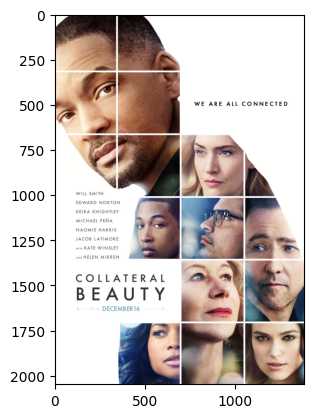

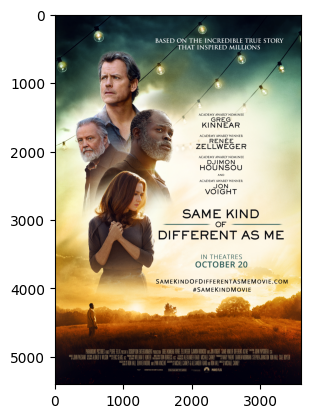

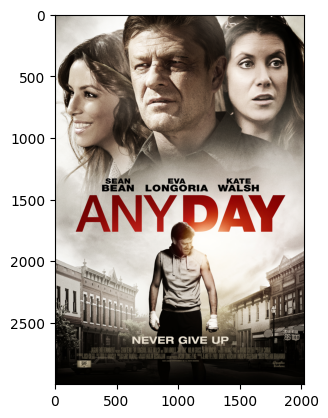

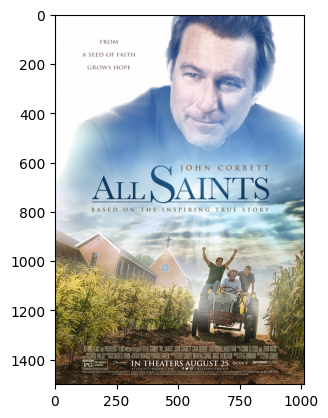

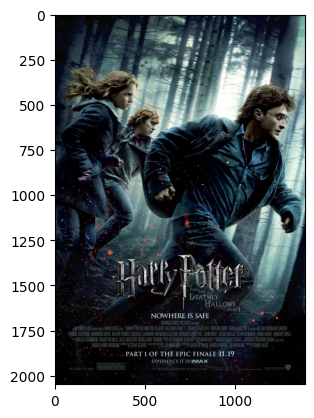

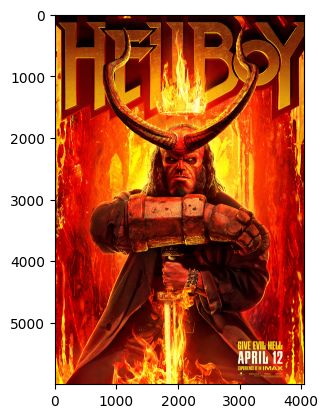

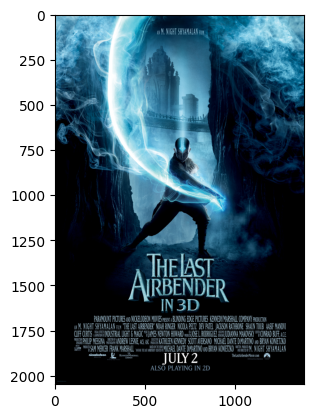

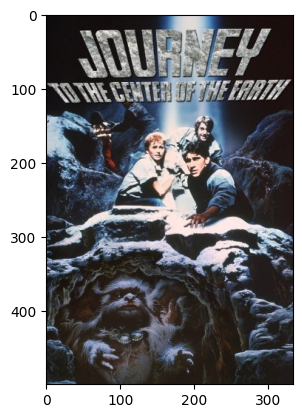

In [252]:
import urllib.request
from PIL import Image

# use similarity matrix to recommend similar movies as the top watched movies
user = '17168'
print('-----------Recommendations for user: ' +user +' -----------')
topWatched = getTopWatched(mergedDataset, int(user), 2)
group_names = list(topWatched['program_name'])
num = 1
urll = ''
for key in group_names:
  print('User('+user+') likes: \n'+key)
  img_list = list()
  movie_user_likes = key
  movie = movies_list[movies_list.program_name == movie_user_likes]
  if method == 2:
    urll = str(movie['poster'].values[0]).replace('\n','')
    print(urll)
    urllib.request.urlretrieve(urll,'im'+str(num)+".png")
    img = Image.open('im'+str(num)+".png")
    plt.figure()
    plt.imshow(img)
  num = num +1
  movie_index = get_index_from_title(movie_user_likes)
  similar_movies = list(enumerate(cosine_sim[movie_index]))
  sorted_similar_movies = sorted(similar_movies,key=lambda x:x[1],reverse=True)[1:]
  i=0
  print("\nTop 3 similar movies to "+movie['program_name'].values[0]+" are:\n")
  recomm = pd.DataFrame()
  recomm = pd.concat([recomm,movie])
  for element in sorted_similar_movies:
    if i > 2 :
      break
    movieName = get_title_from_index(element[0])
    movie_info = movies_list[movies_list.program_name == movieName]
    recomm = pd.concat([recomm, movie_info])
    if method == 2:
      urll = str(movie_info['poster'].values[0]).replace('\n','')
      urllib.request.urlretrieve(urll,'im'+str(num)+".png")
      img = Image.open('im'+str(num)+".png")
      num = num +1
      plt.figure()
      plt.imshow(img)
    i = i +1
  display(recomm[['program_name','combined_features','program_genre']])

-----------Recommendations for user: 20021 -----------
User(20021) likes: 
the nut job : nutty by nature
https://m.media-amazon.com/images/M/MV5BZTA5ZDZhMjgtNjNkOC00MzM0LWFlZmItZTM4MjJkMGEyZGQwXkEyXkFqcGdeQXVyMjM4NTM5NDY@._V1_.jpg

Top 3 similar movies to the nut job : nutty by nature are:



,program_name,combined_features,program_genre
1005,the nut job : nutty by nature,Animation Adventure Comedy Animation excavato...,Animation
194,chicken run,Animation Adventure Comedy Animation chicken ...,Animation
442,inside out,"Animation Adventure Comedy Animation sequel ,...",Animation
46,aladdin,Adventure Comedy Family Animation sequel,Animation


User(20021) likes: 
emoji movie
https://m.media-amazon.com/images/M/MV5BMTkzMzM3OTM2Ml5BMl5BanBnXkFtZTgwMDM0NDU3MjI@._V1_.jpg

Top 3 similar movies to emoji movie are:



,program_name,combined_features,program_genre
274,emoji movie,"Animation Adventure Comedy Animation food ,an...",Animation
442,inside out,"Animation Adventure Comedy Animation sequel ,...",Animation
879,the curse of the were-rabbit,"Animation Adventure Comedy Animation dog ,hun...",Animation
414,howard lovecraft and the frozen kingdom,"Animation Fantasy Animation monster ,scene af...",Animation


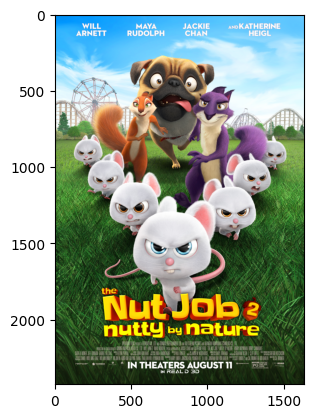

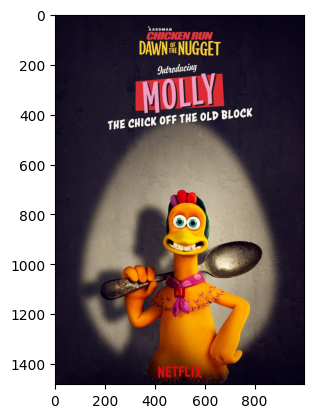

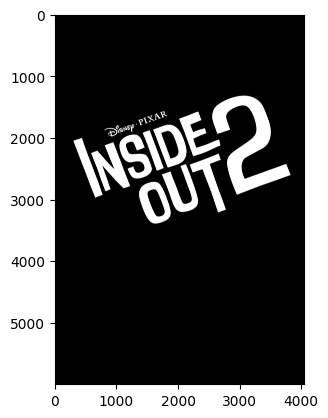

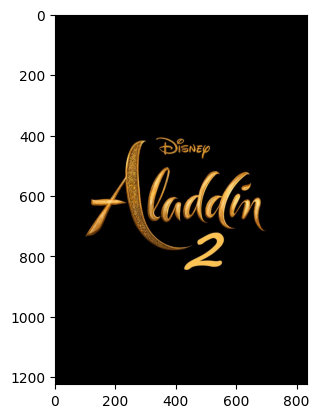

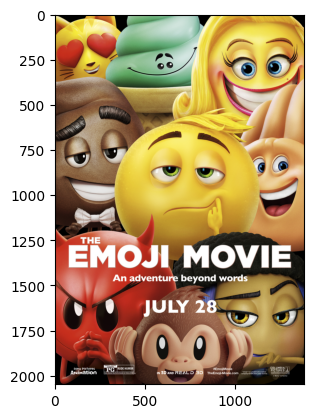

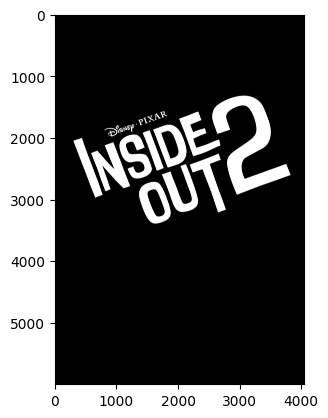

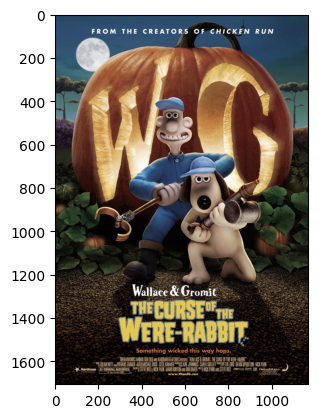

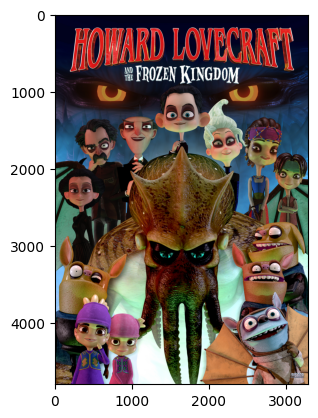

In [257]:
# Another user recommendation
user = '20021'
print('-----------Recommendations for user: ' +user +' -----------')
topWatched = getTopWatched(mergedDataset, int(user), 2)
group_names = list(topWatched['program_name'])
num = 1
urll = ''
for key in group_names:
  print('User('+user+') likes: \n'+key)
  img_list = list()
  movie_user_likes = key
  movie = movies_list[movies_list.program_name == movie_user_likes]
  if method == 2:
    urll = str(movie['poster'].values[0]).replace('\n','')
    print(urll)
    urllib.request.urlretrieve(urll,'im'+str(num)+".png")
    img = Image.open('im'+str(num)+".png")
    plt.figure()
    plt.imshow(img)
  num = num +1
  movie_index = get_index_from_title(movie_user_likes)
  similar_movies = list(enumerate(cosine_sim[movie_index]))
  sorted_similar_movies = sorted(similar_movies,key=lambda x:x[1],reverse=True)[1:]
  i=0
  print("\nTop 3 similar movies to "+movie['program_name'].values[0]+" are:\n")
  recomm = pd.DataFrame()
  recomm = pd.concat([recomm,movie])
  for element in sorted_similar_movies:
    if i > 2 :
      break
    movieName = get_title_from_index(element[0])
    movie_info = movies_list[movies_list.program_name == movieName]
    recomm = pd.concat([recomm, movie_info])
    if method == 2:
      urll = str(movie_info['poster'].values[0]).replace('\n','')
      urllib.request.urlretrieve(urll,'im'+str(num)+".png")
      img = Image.open('im'+str(num)+".png")
      num = num +1
      plt.figure()
      plt.imshow(img)
    i = i +1
  display(recomm[['program_name','combined_features','program_genre']])